In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

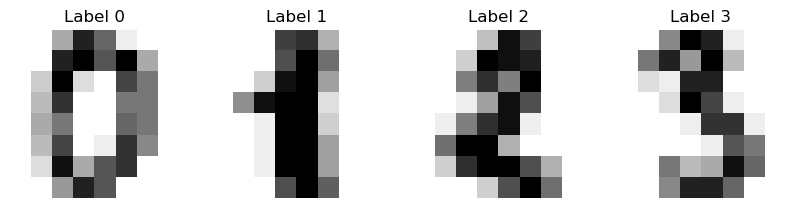

In [28]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [14]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [30]:
# Create a SVC model
model = SVC(kernel='rbf', C=0.9, gamma=0.0005)

# Train our model
model.fit(D_train,y_train)

# Test our model
y_pred = model.predict(D_test)

# Get the accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy is: {accuracy}')

Accuracy is: 0.9555555555555556


In [35]:
#  Set the ranges of parameters C and gamma
C_range = [0.6, 0.8, 1, 2, 4]
gamma_range = [0.0001, 0.0005, 0.001, 0.005]
param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(D, y)

# get the results
print(grid.best_params_, grid.best_score_)

{'C': 4, 'gamma': 0.0005} 0.9744073042401734
